<a href="https://colab.research.google.com/github/emekeh/Hamoye-Data-Science-Internship/blob/main/Stage_E_Quiz_Code_EkeE_M_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import necessary librariies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#### Loading the data and setting the date columns as an index column

In [2]:
#Load dataset
df = pd.read_csv('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [3]:
# No of features and observations of the datasets
df.shape

(92016, 5)

In [4]:
df.dtypes

FullDate      object
Tmax         float64
SysLoad      float64
GasPrice     float64
ElecPrice    float64
dtype: object

In [5]:
#checking for missing values
df.isnull().values.any()

False

In [6]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [7]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [8]:
# converting date to a time series object
from datetime import datetime
df['FullDate'] = pd.to_datetime(df.FullDate)

# Rename the Columns FullDate And ElecPrice
df = df.rename(columns={"FullDate" : "ds" , "ElecPrice" : "y" })
df.set_index('ds', inplace=True)
df.head()

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [9]:
# Resampling from Hourly to Daily data points
df_daily = df.resample('D').sum()

In [11]:
# No of features and observations of the Daily Rate
df_daily.shape

(3834, 4)

**Question 11 plot of ElecPrice over time**

Text(0.5, 1.0, 'Plot of ElecPrice over time')

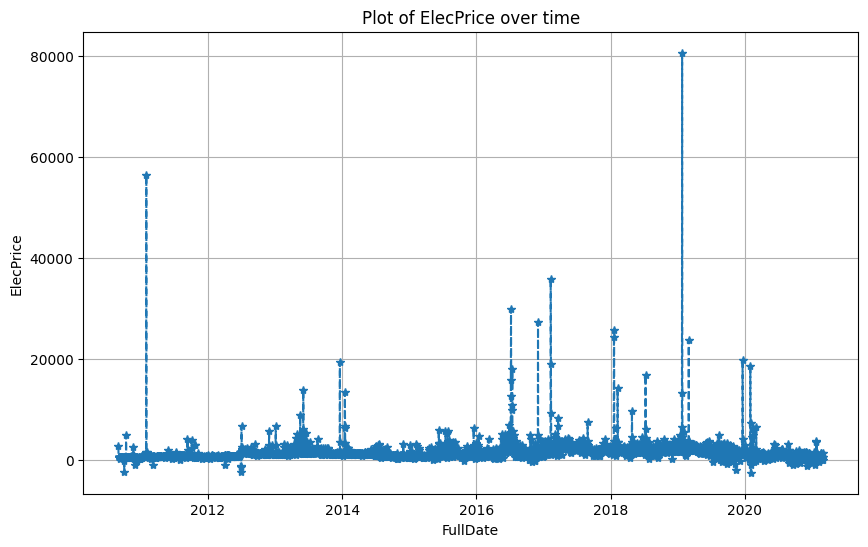

In [12]:

plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.y, '--', marker='*', )
plt.grid()
plt.xlabel('FullDate')
plt.ylabel('ElecPrice')
plt.title('Plot of ElecPrice over time')

**QUESTION 12 & 13: Using the augmented dicky fuller test, what is the p-value of the SysLoad and GasPrice of the resampled dataset to 6 decimal places?**

In [13]:
#Importing the ADF library
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

adf_sysload = adfuller(df_daily['SysLoad'])
adf_gasprice = adfuller(df_daily['GasPrice'])
print(f'p-value of the SysLoad: {round(adf_sysload[1],6)}')
print(f'p-value of the GasPrice: {round(adf_gasprice[1],6)}')

p-value of the SysLoad: 0.004254
p-value of the GasPrice: 0.045027


In [14]:
# Critical Values of GasPrice
adf_gasprice = adfuller(df_daily['GasPrice'])
print(f'ADF Statistic: {round(adf_gasprice[0],4)}')
print('Critical Values:')
for k, v in adf_gasprice[4].items():
  print(f'   {k}: {v}')

ADF Statistic: -2.9028
Critical Values:
   1%: -3.4320693157877544
   5%: -2.8622996992165364
   10%: -2.5671743978048323


In [15]:
# Critical Values of ElecPrice
adf_elecprice = adfuller(df_daily['y'])
print(f'ADF Statistic: {round(adf_elecprice[0],4)}')
print('Critical Values:')

for k, v in adf_elecprice[4].items():
 print(f'{k} : {v}')

ADF Statistic: -8.2691
Critical Values:
1% : -3.432066157296446
5% : -2.8622983040036005
10% : -2.5671736550459663


**Splitting the Dataset into train and test sets**

In [16]:
# Rest the index
df_daily.reset_index(inplace=True)

In [17]:
#Split the dataset
#indexing the first 2757 rows of our data as train set
train_data = df_daily.iloc[:2757,:]

# the last rows i.e 1077 rows are indexed as the test set
test_data = df_daily.iloc[2757:,:]


In [18]:
train_data.shape

(2757, 5)

In [19]:
train_data.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [20]:
test_data.shape

(1077, 5)

In [21]:
test_data.head()

,ds,Tmax,SysLoad,GasPrice,y
2757,2018-03-20,540.0,7696.91130,201.5880,1833.00
2758,2018-03-21,571.2,4658.05865,203.2560,1730.49
2759,2018-03-22,722.4,19161.78525,203.2560,2260.55
2760,2018-03-23,811.2,18090.43435,198.6456,2138.76
2761,2018-03-24,832.8,3763.53865,180.2160,1721.70


**QUESTION 14: Evaluate the result of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?**

In [22]:
# Defining the MAPE function
def mape(y, yhat):
  y = y.reset_index(drop=True)
  return round(np.mean(np.abs((y - yhat)/y)*100),2)

In [24]:
from prophet import Prophet
# fit train data to fb prophet model
model_1 = Prophet()
model_1.fit(train_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2kmqecif/t07an_3y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2kmqecif/0_c7rf4u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40358', 'data', 'file=/tmp/tmp2kmqecif/t07an_3y.json', 'init=/tmp/tmp2kmqecif/0_c7rf4u.json', 'output', 'file=/tmp/tmp2kmqecif/prophet_model2yt7set7/prophet_model-20230725095221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:52:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:52:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [25]:
pred1 = model_1.predict(test_data)
mape(test_data['y'],pred1['yhat'])

544.09

**QUESTION 15: What is the RMSE in 2 decimal places?**

In [26]:
# Defining the RMSE function
def rmse(y, yhat):
  y = y.reset_index(drop=True)
  return round(np.sqrt(np.mean(np.square(y - yhat))),2)

In [ ]:
rmse(test_data['y'], pred1['yhat'])

3218.16

**QUESTION 16: From the forecasted model, what month of the yearly seasonality has the highest value?**

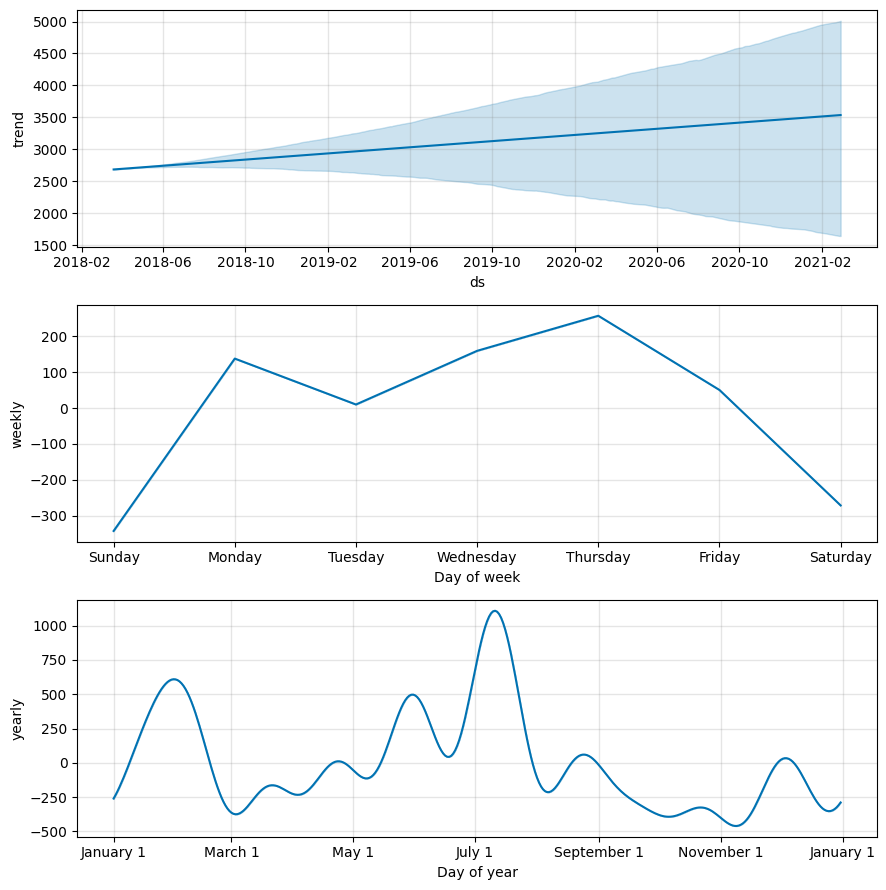

In [27]:
model_1.plot_components(pred1)
plt.show()

In [28]:
#For questions 17 to 19, rename the 3 independent variables [‘SysLoad’,’Tmax’,’GasPrice’']
#to [‘add1’, ‘add2’, ‘add3’’] respectively, as the regressors

#Rename "SysLoad", "Tmax", and "GasPrice" to "add1", "add2", and "add3" respectively
new_df = df_daily.rename(columns={"SysLoad" : "add1" , "Tmax" : "add2", "GasPrice" : "add3" })
new_df.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [29]:
# assign train and test data
train2 = new_df[:2757]
test2 = new_df[2757:]
print('train shape', train2.shape)
print('test shape', test2.shape)

train shape (2757, 5)
test shape (1077, 5)


In [30]:
#Create multivariate model
model2 = Prophet()

model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')

In [31]:
model2.fit(train2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2kmqecif/z90vqlvu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2kmqecif/_j1hh7nz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85840', 'data', 'file=/tmp/tmp2kmqecif/z90vqlvu.json', 'init=/tmp/tmp2kmqecif/_j1hh7nz.json', 'output', 'file=/tmp/tmp2kmqecif/prophet_modellf3oigga/prophet_model-20230725100204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:02:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:02:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**QUESTION 17: Evaluate the result of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?**

In [33]:
#Evaluate MAPE on the test set
pred2 = model2.predict(test2)
mape(test_data['y'],pred2['yhat'])

231.48

**QUESTION 18: What is the RMSE in 2 decimal places?**

In [34]:
#RMSE on test set
rmse(test2['y'],pred2['yhat'])

2707.16

**QUESTION 19: If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?**

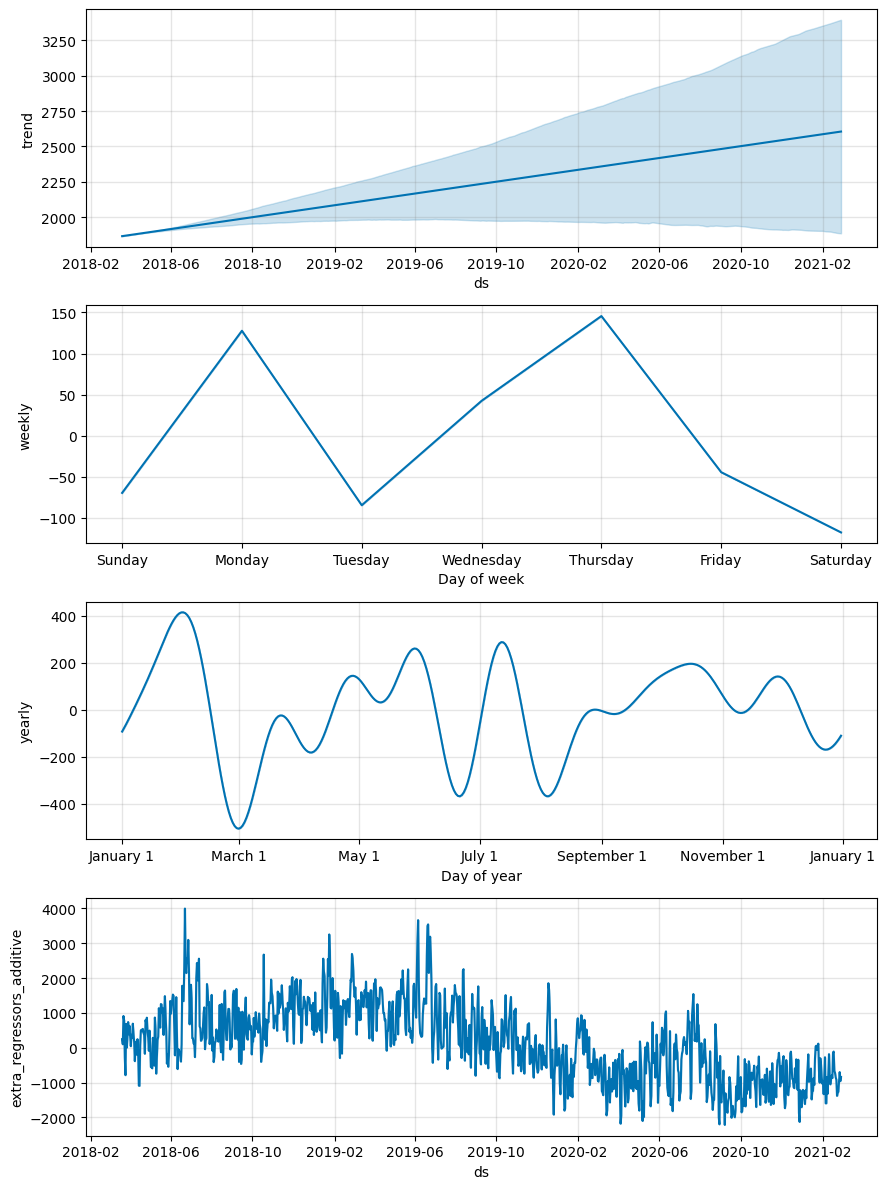

In [35]:
model2.plot_components(pred2)
plt.show()

In [36]:
# Split the dataset
train3 = new_df.iloc[:2757,:]
test3 = new_df.iloc[2757:,:]
train3.shape , test3.shape

((2757, 5), (1077, 5))

In [37]:
#Training a forecast model without 'Tmax'
model_3 = Prophet()
model_3.add_regressor('add1')
model_3.add_regressor('add3')

In [38]:
model_3.fit(train3)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2kmqecif/3l8pjvw9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2kmqecif/lnrdxj1q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34161', 'data', 'file=/tmp/tmp2kmqecif/3l8pjvw9.json', 'init=/tmp/tmp2kmqecif/lnrdxj1q.json', 'output', 'file=/tmp/tmp2kmqecif/prophet_modeltrw0eyrv/prophet_model-20230725100837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:08:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:08:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Question 20:Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max),What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?**

In [39]:
pred3 = model_3.predict(test3)
mape(test3['y'],pred3['yhat'])

232.0

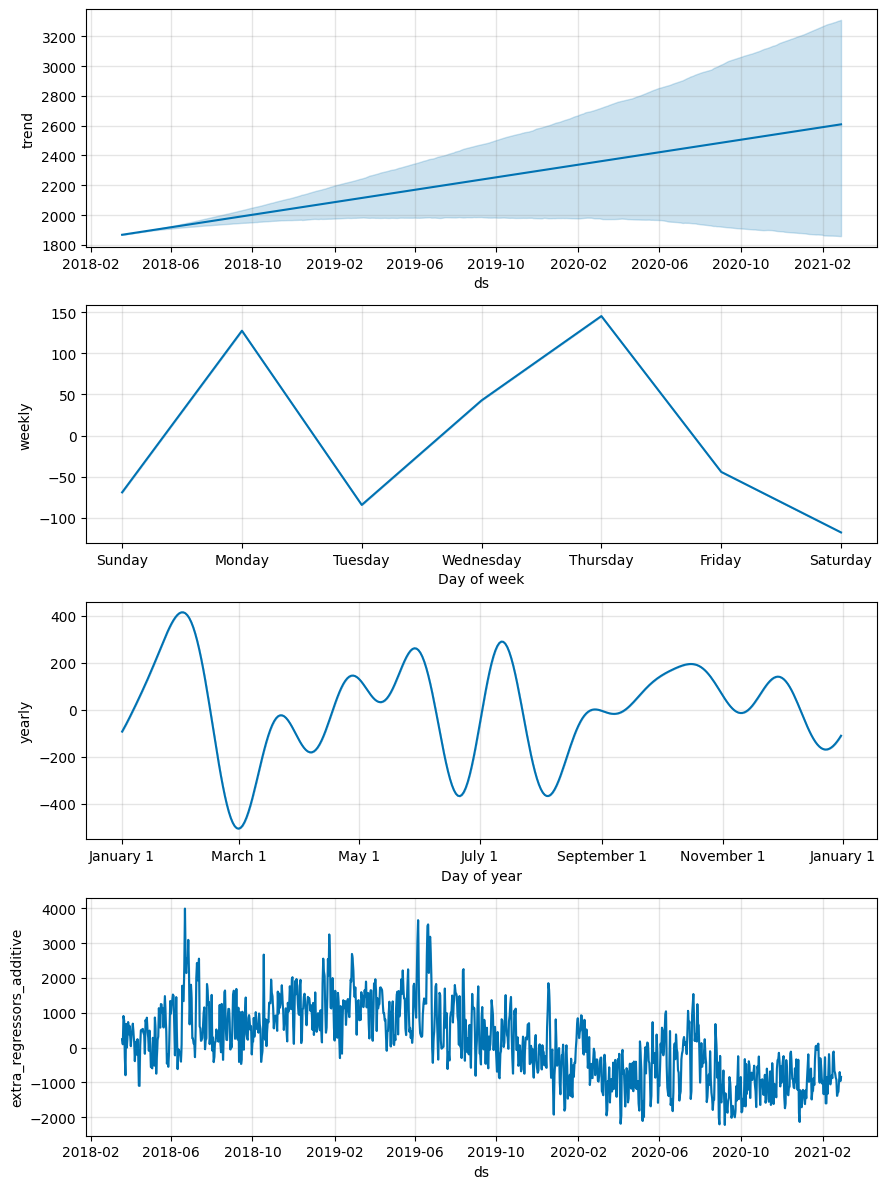

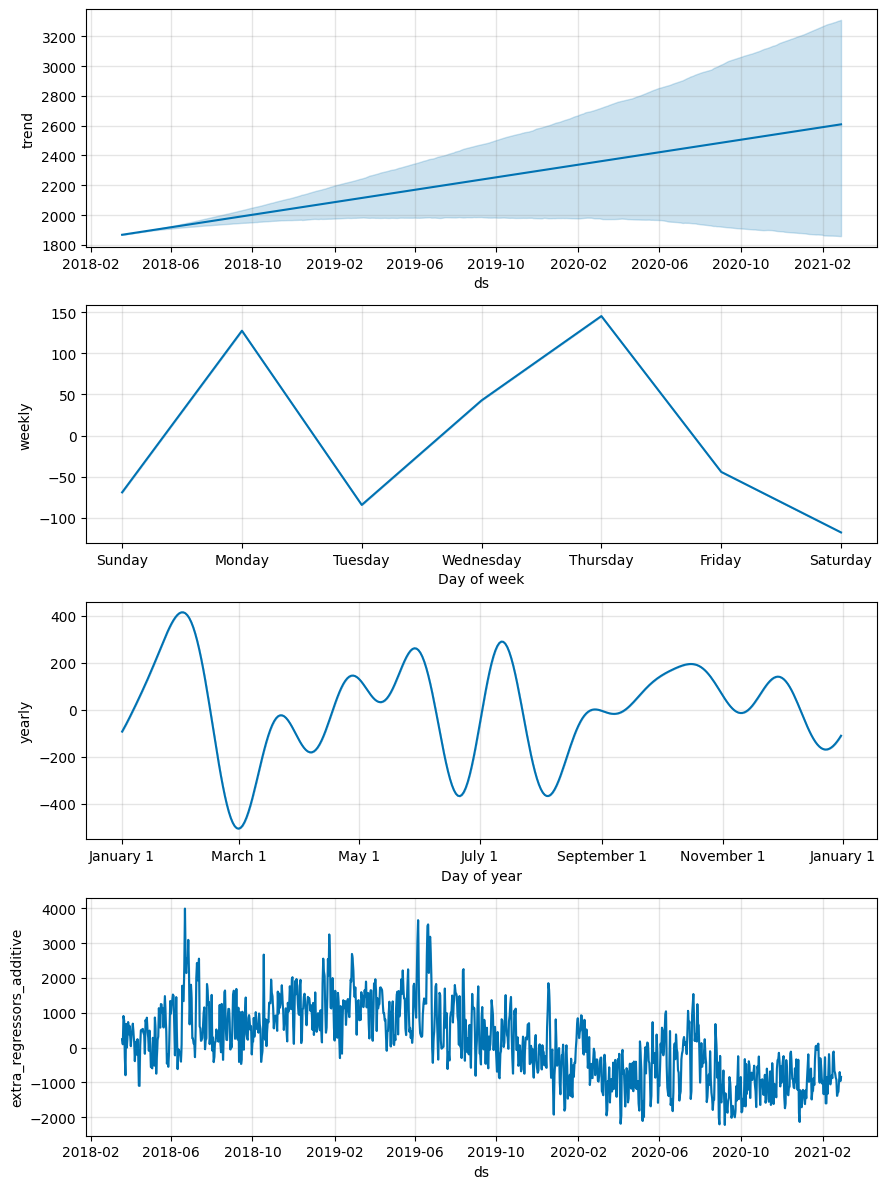

In [40]:
model_3.plot_components(pred3)